## Body Language Analysis

In [339]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib.pyplot
warnings.filterwarnings('ignore')

In [340]:
# Read the data
experiment_file_path = '../data/experiment-new.csv'
df_experiment = pd.read_csv(experiment_file_path)

In [341]:
# Clean the data # Clean the scores
df_experiment.columns = [c.replace(' ', '_') for c in df_experiment.columns]
df_experiment.Score = df_experiment.Score.map(lambda x: int(x[0]))
df_experiment.Score3 = df_experiment.Score3.map(lambda x: int(x[0]))

# Rename some columns for convenience
df_experiment['Country'] = df_experiment['1.1_Which_country_are_you_from?']
df_experiment['Gender'] = df_experiment['1.2_Please_choose_your_gender']
df_experiment.drop(columns=['1.1_Which_country_are_you_from?', '1.2_Please_choose_your_gender'], inplace=True)

# Filter out the rows required
retain_cols = ['Country', 'Gender', 'Age', 'Calc', 'Calc2', 'Calc3', 'Calc4', 'Calc5', 'Calc6', 'Calc7', 'Calc8', 'Score', 'Calc9', 'Calc10', 'Calc11', 'Calc12', 'Calc13', 'Calc14', 'Score3']
df_experiment = df_experiment.filter(items=retain_cols, axis='columns')

In [342]:
display(df_experiment.sample(5))

,Country,Gender,Age,Calc,Calc2,Calc3,Calc4,Calc5,Calc6,Calc7,Calc8,Score,Calc9,Calc10,Calc11,Calc12,Calc13,Calc14,Score3
32,Ukraine,Male,23,-2,1,-1,1,-1,-1,-1,0,2,2,0,-3,0,-3,-2,6
30,Iran,Male,20,2,1,0,1,0,-1,-1,0,3,-2,-1,-2,0,-3,-3,4
14,Germany,Male,31,1,1,0,0,0,1,2,0,0,0,3,1,2,0,1,2
50,Brazil,Male,25,0,2,0,2,1,0,1,3,6,1,-1,0,0,0,1,3
60,India,Female,25,3,1,3,-3,-3,2,0,-1,2,-1,0,-1,0,0,1,3


In [ ]:
# Helper functions
# Functions to calculate the the user's awareness before and after the survey
# Each respondent is assigned a value True/False based on their answers, before and after the survey
def taboo_rating(row):
    count = 0
    if(row['Calc'] > 0):
        count+=1
    if(row['Calc2'] > 0):
        count+=1
    if(row['Calc3'] > 0):
        count+=1
    if(row['Calc4'] > 0):
        count+=1
    if(row['Calc5'] > 0):
        count+=1
    if(row['Calc6'] > 0):
        count+=1
    if(row['Calc7'] > 0):
        count+=1
    if(row['Calc8'] > 0):
        count+=1
    if(count >= 2):
        return True
    else: 
        return False
    
def body_lang_rating(row):
    count = 0
    if(row['Calc9'] > 0):
        count+=1
    if(row['Calc10'] > 0):
        count+=1
    if(row['Calc11'] > 0):
        count+=1
    if(row['Calc12'] > 0):
        count+=1
    if(row['Calc13'] > 0):
        count+=1
    if(row['Calc14'] > 0):
        count+=1
    if(count >= 2):
        return True
    else: 
        return False

def calculate_percentage_country(subject_dataframe, country_total):
    x_ticks = []
    y_ticks = []
    aware_countries, num = subject_dataframe.Country.value_counts().index, subject_dataframe.Country.value_counts()
    for c, n in zip(aware_countries, num):
        x_ticks.append(c)
        y_ticks.append(round((n/country_total.get(c))*100))
    return (x_ticks, y_ticks) 

In [343]:
# Group single respondents from a particular country into a group called 'Other'
num, country = df_experiment.Country.value_counts(), df_experiment.Country.value_counts().index
countries_with_single_respondent = []
for c, n in zip(country, num):
    if(n == 1):
        countries_with_single_respondent.append(c)
df_experiment.Country.replace(to_replace=countries_with_single_respondent, value='Other', inplace=True)
num, country = df_experiment.Country.value_counts(), df_experiment.Country.value_counts().index # update values
# Store the total number of respondents grouped by country
country_total = dict((c, n) for c, n in zip(country, num))

In [344]:
# How many countries answered the survey

countries = df_experiment['Country']
print("Total number of participants: ", countries.count())

Total number of participants:  61


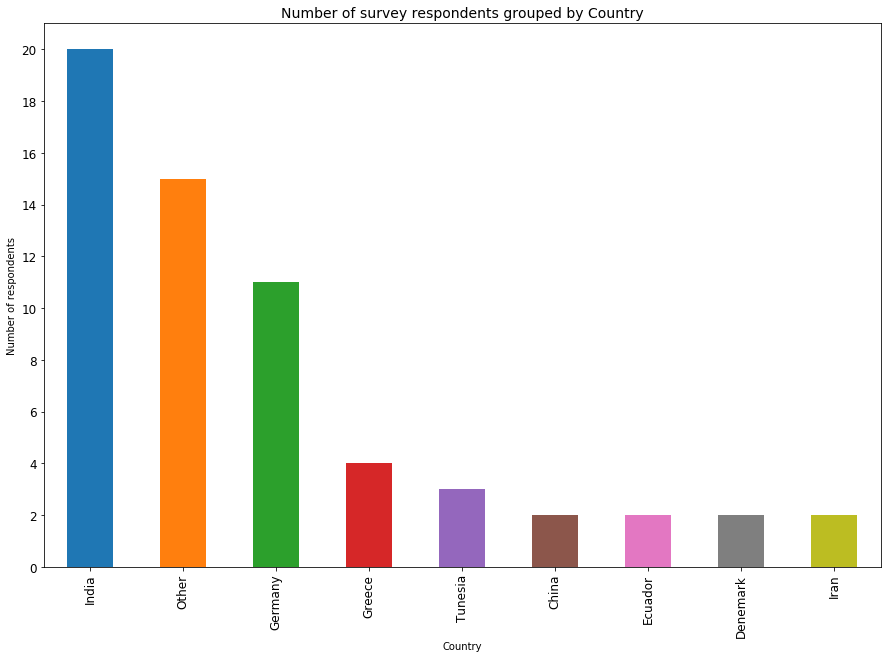

In [372]:
# Number of respondents, grouped by country
fig = plt.figure()
props = {
    'title' : 'Number of survey respondents grouped by Country',
    'yticks' : range(0,22,2),
    'figsize' : (15, 10),
    'fontsize' : 12
}
ax = df_experiment['Country'].value_counts().plot.bar(**props)
ax.set_xlabel('Country')
ax.set_ylabel('Number of respondents')
ax = fig.add_subplot(ax)
ax.title.set_fontsize(14)
fig.savefig('respondents-per-country.eps', dpi=5000)

In [358]:
# score above 3 sorted by country

country_based_score = df_experiment[['Country', 'Score', 'Score3']]
country_based_score_greaterthan3 = country_based_score.loc[(country_based_score['Score'] > 3) | (country_based_score['Score3'] > 3)]
countries_count_score = country_based_score_greaterthan3['Country']

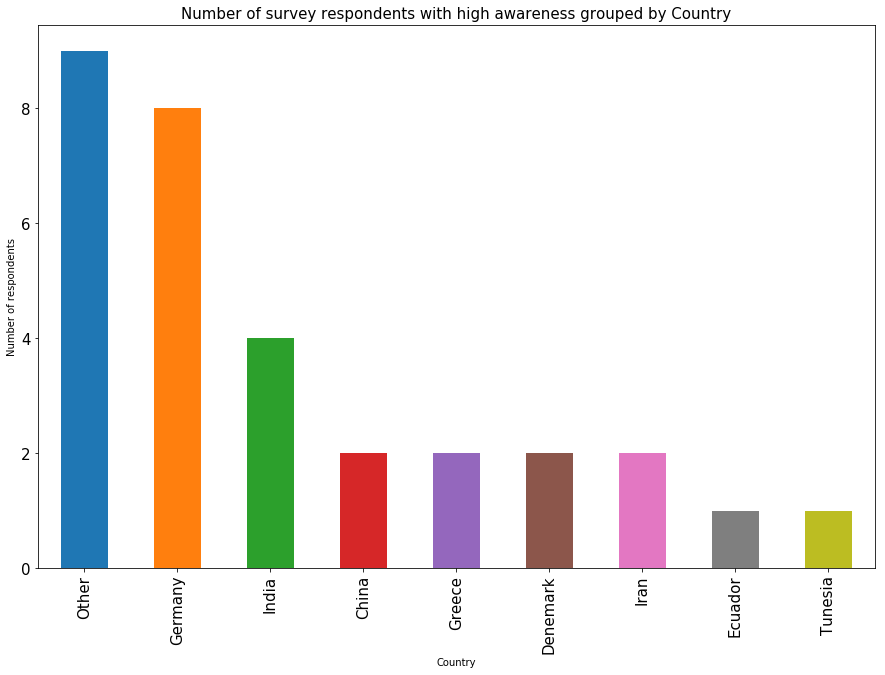

In [367]:
fig = plt.figure()
props = {
    'title' : 'Number of survey respondents with high awareness grouped by Country',
    'yticks' : range(0,10,2),
    'figsize' : (15, 10),
    'fontsize' : 15
}
ax = countries_count_score.value_counts().plot.bar(**props)
ax.set_xlabel('Country', fontsize=10)
ax.set_ylabel('Number of respondents')
ax = fig.add_subplot(ax)
ax.title.set_fontsize(15)
fig.savefig('increase-of-awareness-grouped-by-country.eps', dpi=5000)

In [348]:
# Score above 3 sorted by gender

gender_based_score = df_experiment[['Gender', 'Score', 'Score3']]
total_males = gender_based_score.loc[gender_based_score['Gender'] == "Male"]
total_males = total_males.count()
total_females = gender_based_score.loc[gender_based_score['Gender'] == "Female"]
total_females = total_females.count()

gender_based_score_greaterthan3 = gender_based_score.loc[(gender_based_score['Score'] > 3) | (gender_based_score['Score3'] > 3)]
gender_count_score = gender_based_score_greaterthan3['Gender']
print("Total number of people sorted by Gender: \n Males %d Females %d" %(total_males[1], total_females[1]) )
print("Score above 3 sorted by Gender:\n", gender_count_score.value_counts())

calculate_percentage_males = (26/total_males[1]) * 100
calculate_percentage_females = (5/total_females[1]) * 100
print("Percentage Males: %d%% Females: %d%%" %(calculate_percentage_males, calculate_percentage_females))

Total number of people sorted by Gender: 
 Males 50 Females 11
Score above 3 sorted by Gender:
 Male      26
Female     5
Name: Gender, dtype: int64
Percentage Males: 52% Females: 45%


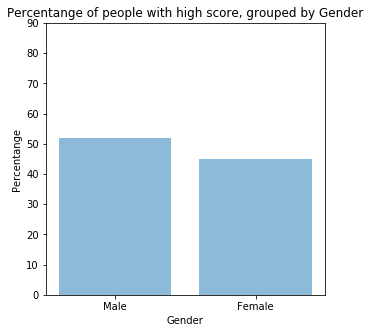

In [349]:
objects = ('Male', 'Female')
y_pos = np.arange(len(objects))
performance = [52, 45]
 
plt.figure(figsize=(5,5))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percentange of respondents')
plt.yticks(range(0,100,10))
plt.xlabel('Gender')
plt.title('Percentange of people with high score, grouped by Gender')
plt.savefig('highest-grade-gender.eps', dpi=5000)
plt.show()

In [351]:
# Applying the above functions and separating relavant data into df_taboo and df_bodylang
df_experiment['taboo_rating'] = df_experiment.apply(taboo_rating, axis=1)
df_experiment['body_lang_rating'] = df_experiment.apply(body_lang_rating, axis=1)

# Filter based on taboo rating and Score (positive)
df_taboo = df_experiment[['Country', 'Gender', 'Age', 'taboo_rating', 'Score']]
df_taboo = df_taboo.loc[(df_taboo['taboo_rating']) & (df_taboo['Score'] > 3)]

# Filter based on bodylang rating and Score (positive)
df_bodylang = df_experiment[['Country', 'Gender', 'Age', 'body_lang_rating', 'Score3']]
df_bodylang = df_bodylang.loc[(df_bodylang['body_lang_rating'] & (df_bodylang['Score3'] > 3))]

# Filter based on taboo rating and Score (negative)
df_taboo_neg = df_experiment[['Country', 'Gender', 'Age', 'taboo_rating', 'Score']]
df_taboo_neg = df_taboo_neg.loc[~(df_taboo_neg['taboo_rating']) & (df_taboo_neg['Score'] > 3)]

# Filter based on bodylang rating and Score (negative)
df_bodylang_neg = df_experiment[['Country', 'Gender', 'Age', 'body_lang_rating', 'Score3']]
df_bodylang_neg = df_bodylang_neg.loc[~(df_bodylang_neg['body_lang_rating']) & (df_bodylang_neg['Score3'] > 3)]

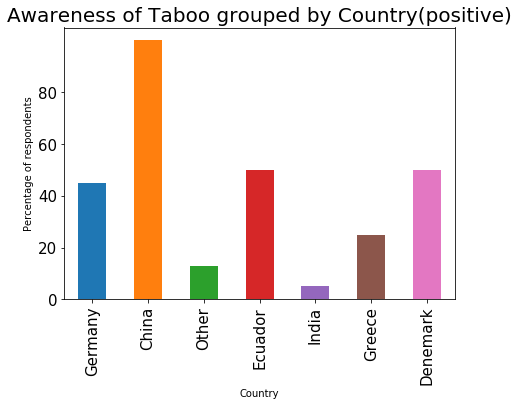

In [374]:
# Represent the above data Graphically including Indian-subcontinent
fig = plt.figure(figsize=(7,5))
x_ticks, y_ticks = calculate_percentage_country(df_taboo, country_total=country_total)
df_taboo_plot = pd.Series(y_ticks, index=x_ticks)
ax1 = df_taboo_plot.plot(kind='bar', title='Awareness of Taboo grouped by Country(positive)', yticks=range(0, 100, 20), fontsize=15)
ax1.set_ylabel('Percentage of respondents')
ax1.set_xlabel('Country')
ax1.title.set_size(20)
fig.add_subplot(ax1)
fig.show()
fig.savefig('awareness-taboo-positive.eps', dpi=5000)

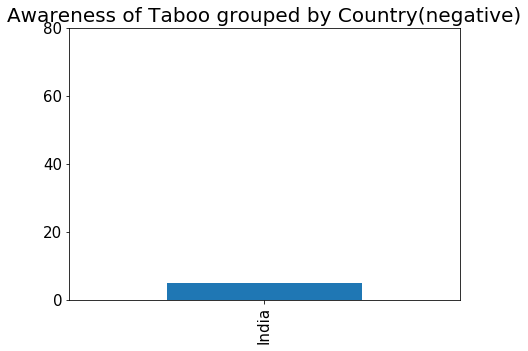

In [353]:
fig = plt.figure(figsize=(7,5))
x_ticks, y_ticks = calculate_percentage_country(df_taboo_neg, country_total=country_total)
df_taboo_plot = pd.Series(y_ticks, index=x_ticks)
ax = df_taboo_plot.plot(kind='bar', title='Awareness of Taboo grouped by Country(negative)', yticks=range(0, 100, 20), fontsize=15)
ax1.set_ylabel('Percentage of respondents')
ax1.set_xlabel('Country')
ax.title.set_size(20)
fig.add_subplot(ax)
fig.show()
fig.savefig('awareness-taboo-negative.eps', dpi=5000)

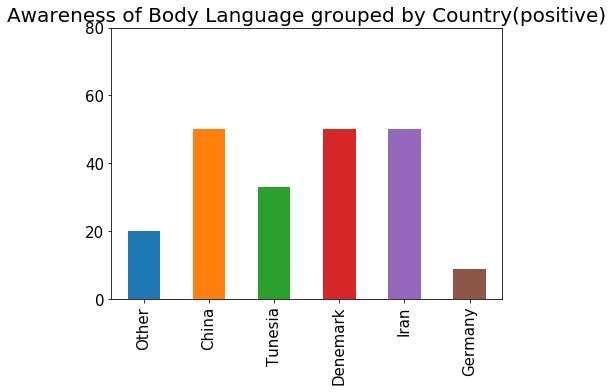

In [354]:
fig = plt.figure(figsize=(7,5))
x_ticks, y_ticks = calculate_percentage_country(df_bodylang, country_total=country_total)
df_bodylang_plot = pd.Series(y_ticks, index=x_ticks)
ax2 = df_bodylang_plot.plot(kind='bar', title='Awareness of Body Language grouped by Country(positive)', yticks=range(0, 100, 20), fontsize=15)
ax1.set_ylabel('Percentage of respondents')
ax1.set_xlabel('Country')
ax2.title.set_size(20)
fig.add_subplot(ax2)
fig.show()
fig.savefig('awareness-bodylang-positive.eps', dpi=5000)

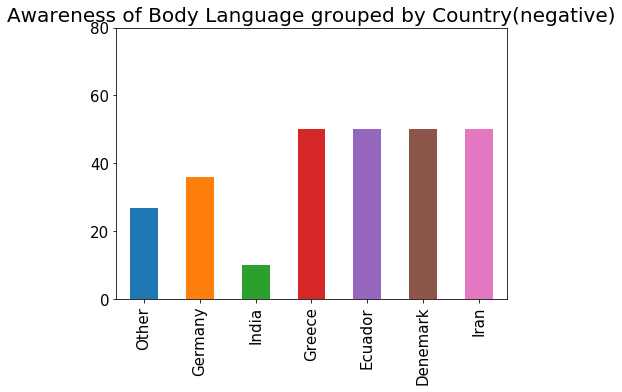

In [355]:
fig = plt.figure(figsize=(7,5))
x_ticks, y_ticks = calculate_percentage_country(df_bodylang_neg, country_total=country_total)
df_bodylang_plot = pd.Series(y_ticks, index=x_ticks)
ax3 = df_bodylang_plot.plot(kind='bar', title='Awareness of Body Language grouped by Country(negative)', yticks=range(0, 100, 20), fontsize=15)
ax1.set_ylabel('Percentage of respondents')
ax1.set_xlabel('Country')
ax3.title.set_size(20)
fig.add_subplot(ax3)
fig.show()
fig.savefig('awareness-bodylang-negative.eps', dpi=5000)

In [356]:
# BF, Score(BY)
# check how BF and Score relate to each other

In [357]:
# separate India from dataframe
# compare calc values for them